# Capstone 3 - Healthcare Facility Utilization Network Analysis

## Project Introduction

### Objective
The objective of this project is to understand the network of healthcare utilization within a region by analyzing patterns of healthcare facility use. This analysis aims to identify how resources are distributed and the factors influencing high healthcare costs, particularly focusing on cardiovascular diseases, which have been identified as high-cost areas.

## Project Overview

### Objectives
1. **Construct a Network Model**: Develop a network model of healthcare facilities based on available data.
2. **Analyzing High-Cost Cases**: Analyze high-cost healthcare cases to understand the factors driving high expenses in the healthcare system.
3. **Data-Driven Recommendations**: Make data-driven recommendations for resource allocation and policy development to optimize healthcare facility utilization.



In [35]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Load the Dataset
dataset = pd.read_csv('Healthcare_Cost_and_Utilization_Project__HCUP__-_National_Inpatient_Sample_20240415.csv')

## Data Wrangling

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowId                       600 non-null    object 
 1   YearStart                   600 non-null    int64  
 2   LocationAbbr                600 non-null    object 
 3   LocationDesc                600 non-null    object 
 4   DataSource                  600 non-null    object 
 5   PriorityArea1               120 non-null    object 
 6   PriorityArea2               0 non-null      float64
 7   PriorityArea3               40 non-null     object 
 8   PriorityArea4               0 non-null      float64
 9   Class                       600 non-null    object 
 10  Topic                       520 non-null    object 
 11  Question                    520 non-null    object 
 12  Data_Value_Type             600 non-null    object 
 13  Data_Value_Unit             520 non

In [8]:
# Display Basic Information 
dataset.describe()

,YearStart,PriorityArea2,PriorityArea4,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationId,GeoLocation
count,600.000000,0.0,0.0,587.000000,600.000000,587.000000,587.00000,600.0,0.0
mean,2017.500000,NaN,NaN,578.709199,566.127167,564.759284,592.66644,59.0,NaN
std,1.118967,NaN,NaN,1266.999203,1256.028593,1238.744623,1295.26938,0.0,NaN
min,2016.000000,NaN,NaN,1.000000,-2.000000,0.800000,1.20000,59.0,NaN
25%,2016.750000,NaN,NaN,2.850000,2.775000,2.550000,3.10000,59.0,NaN
50%,2017.500000,NaN,NaN,18.200000,10.800000,16.900000,19.50000,59.0,NaN
75%,2018.250000,NaN,NaN,483.350000,475.700000,469.500000,498.05000,59.0,NaN
max,2019.000000,NaN,NaN,8365.600000,8365.600000,8167.400000,8563.80000,59.0,NaN


In [7]:
# Check for missing Values
dataset.isnull().sum()

RowId                           0
YearStart                       0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
PriorityArea1                 480
PriorityArea2                 600
PriorityArea3                 560
PriorityArea4                 600
Class                           0
Topic                          80
Question                       80
Data_Value_Type                 0
Data_Value_Unit                80
Data_Value                     13
Data_Value_Alt                  0
Data_Value_Footnote_Symbol    587
Data_Value_Footnote           587
Low_Confidence_Limit           13
High_Confidence_Limit          13
Break_Out_Category              0
Break_Out                       0
ClassId                         0
TopicId                        80
QuestionId                      0
Data_Value_TypeID               0
BreakOutCategoryId              0
BreakOutId                      0
LocationId                      0
GeoLocation   

# Initial Data Wrangling Report

## Columns with All Missing Values:
- `PriorityArea2` and `PriorityArea4` have no non-null values out of 600 entries. They should be dropped as they do not contain any data.
- `GeoLocation` also has 600 missing values, indicating this column is entirely empty and should be removed.
- `PriorityArea3` is missing 560 of 600 entries and should probably be dropped.

## Columns with Some Missing Values:
- `Topic`, `Question`, `Data_Value_Unit`, and `TopicId` each have 80 missing values. Decisions on how to handle these depend on their significance to the analysis.
- `Data_Value`, `Low_Confidence_Limit`, and `High_Confidence_Limit` have 13 missing values each. Depending on the analysis, these could be imputed or the corresponding rows could be dropped.
- `Data_Value_Footnote_Symbol` and `Data_Value_Footnote` are mostly missing except for 13 entries. It is likely these columns can be dropped unless the footnotes are crucial for interpretation.

## Potential Redundancies:
- It seems there are columns that might be redundant or unnecessary for the network analysis, such as `Data_Value_Alt`, `ClassId`, `QuestionId`, `Data_Value_TypeID`, `BreakOutCategoryId`, and `BreakOutId`. These might be IDs that relate to other metadata not needed for our analysis.

## Consistency and Standardization:
- We should ensure that categorical data are consistent. For instance, there should be standard naming conventions for `LocationDesc`, `DataSource`, `PriorityArea1`, `Class`, `Topic`, etc.
- We may need to convert certain text columns to categorical types if they contain a limited number of unique entries.

## Descriptive Statistics:
- The `YearStart` column has a range from 2017 to 2019, which indicates the timeframe of the data.
- The numerical columns such as `Data_Value`, `Low_Confidence_Limit`, and `High_Confidence_Limit` have a wide range, indicating a need for normalization or standardization during the preprocessing phase.

## Next Steps for Data Wrangling:
1. Drop entirely empty columns.
2. Decide on a strategy for handling rows with missing data in `Topic`, `Question`, etc.
3. Evaluate the necessity of potential ID columns for the analysis and remove if unnecessary.
4. Standardize categorical columns and convert them to appropriate data types.
5. Consider imputation strategies for the `Data_Value` and confidence limit columns.
6. Assess the distribution of data and decide on the need for data transformation or scaling.

In [21]:
# Dropping columns that are completely empty or likely irrelevant to the analysis
columns_to_drop = ['PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'GeoLocation',
                   'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                   'ClassId', 'QuestionId', 'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId']
dataset_cleaned = dataset.drop(columns=columns_to_drop)

In [27]:
# Handling missing values for 'Topic', 'Question', 'Data_Value_Unit', and 'TopicId'
# Since these are categorical, we will fill missing values with a placeholder 'Unknown'
dataset_cleaned[['Topic', 'Question', 'Data_Value_Unit', 'TopicId', 'PriorityArea1']] = dataset_cleaned[
    ['Topic', 'Question', 'Data_Value_Unit', 'TopicId', 'PriorityArea1']].fillna('Unknown')

In [23]:
# For the numerical columns 'Data_Value', 'Low_Confidence_Limit', and 'High_Confidence_Limit',
# we will perform imputation. In this case, since it's a small fraction of missing data, we'll use the mean of each column.
for col in ['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']:
    dataset_cleaned[col].fillna(dataset_cleaned[col].mean(), inplace=True)

In [30]:
# Check if there are any other missing values remaining
remaining_missing_values = dataset_cleaned.isnull().sum()

# Let's also convert categorical columns to the 'category' data type for memory efficiency
categorical_columns = dataset_cleaned.select_dtypes(include=['object']).columns
dataset_cleaned[categorical_columns] = dataset_cleaned[categorical_columns].astype('category')

In [31]:
# Final check of the cleaned dataset
cleaned_data_info = dataset_cleaned.info()

(remaining_missing_values, cleaned_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RowId                  600 non-null    category
 1   YearStart              600 non-null    int64   
 2   LocationAbbr           600 non-null    category
 3   LocationDesc           600 non-null    category
 4   DataSource             600 non-null    category
 5   PriorityArea1          600 non-null    category
 6   Class                  600 non-null    category
 7   Topic                  600 non-null    category
 8   Question               600 non-null    category
 9   Data_Value_Type        600 non-null    category
 10  Data_Value_Unit        600 non-null    category
 11  Data_Value             600 non-null    float64 
 12  Data_Value_Alt         600 non-null    float64 
 13  Low_Confidence_Limit   600 non-null    float64 
 14  High_Confidence_Limit  600 non-null    flo

(RowId                    0
 YearStart                0
 LocationAbbr             0
 LocationDesc             0
 DataSource               0
 PriorityArea1            0
 Class                    0
 Topic                    0
 Question                 0
 Data_Value_Type          0
 Data_Value_Unit          0
 Data_Value               0
 Data_Value_Alt           0
 Low_Confidence_Limit     0
 High_Confidence_Limit    0
 Break_Out_Category       0
 Break_Out                0
 TopicId                  0
 LocationId               0
 dtype: int64,
 None)

# Completed Data Wrangling Report

## Steps Taken:
1. Removed columns that were entirely empty or likely not useful for our analysis.
2. Filled missing values in categorical columns with a placeholder 'Unknown'.
3. Imputed missing values in numerical columns with the mean of each column.
4. Converted categorical text columns to the 'category' data type for memory efficiency.

## Outcome:
- The dataset now has no missing values.
- Memory usage has been optimized by converting to appropriate data types.
- We are left with 20 columns, each with 600 non-null entries, indicating that the dataset is clean and ready for exploratory data analysis (EDA).

## Next Steps:
- Move to Exploratory Data Analysis (EDA) to look for patterns, anomalies, relationships between features, and initial insights into the network of healthcare facilities.


## Exploratory Data Analysis (EDA)

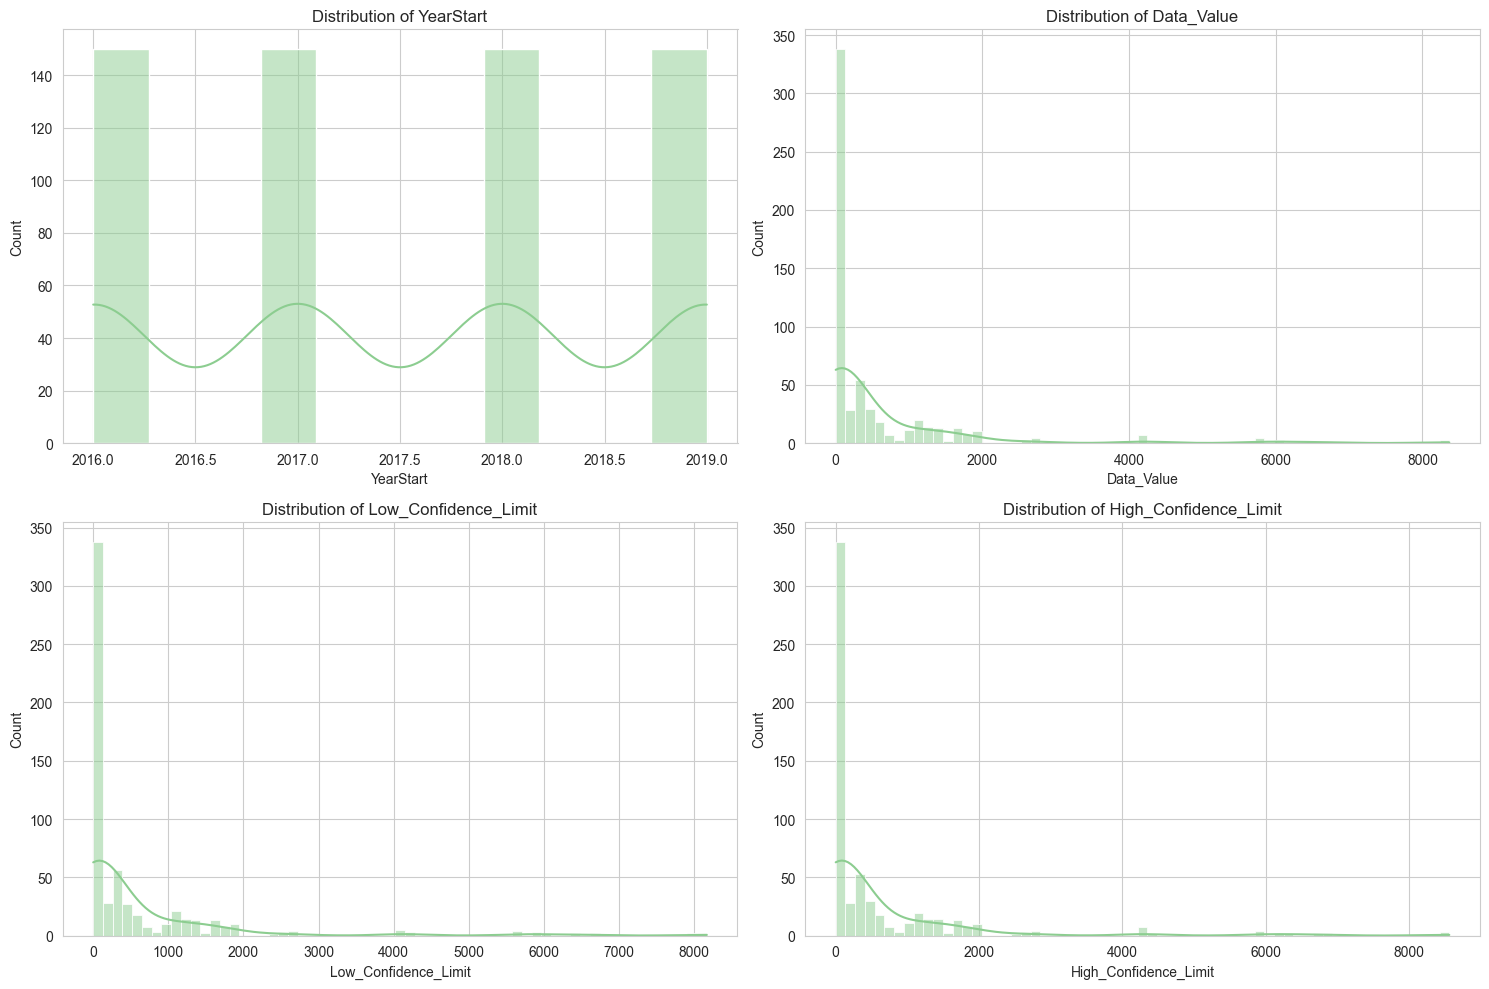

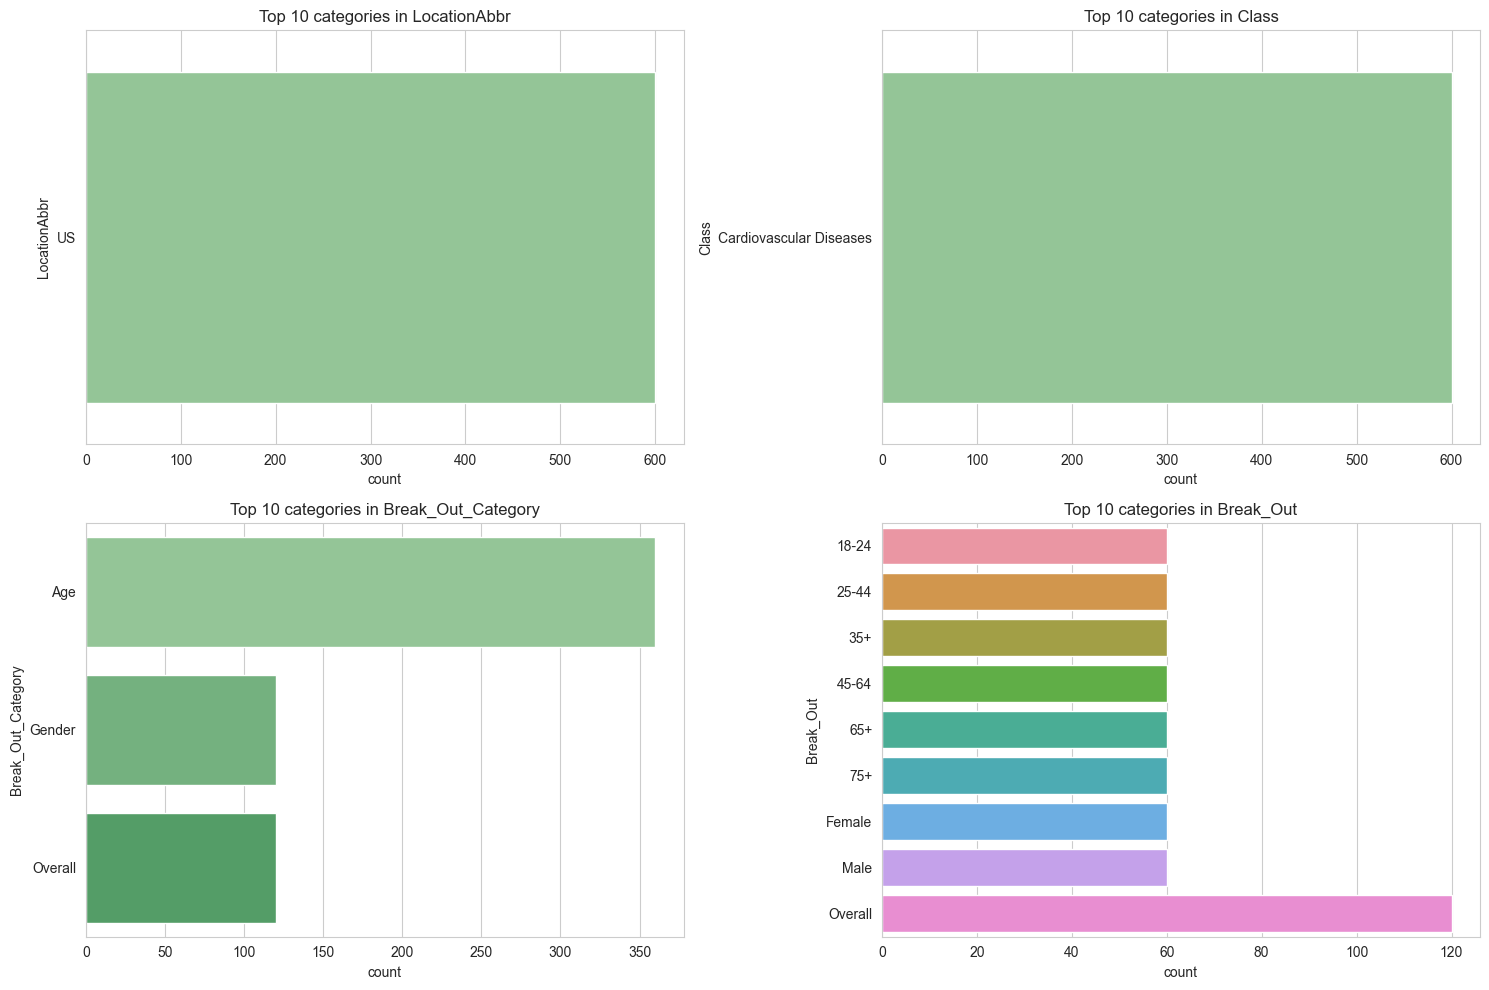

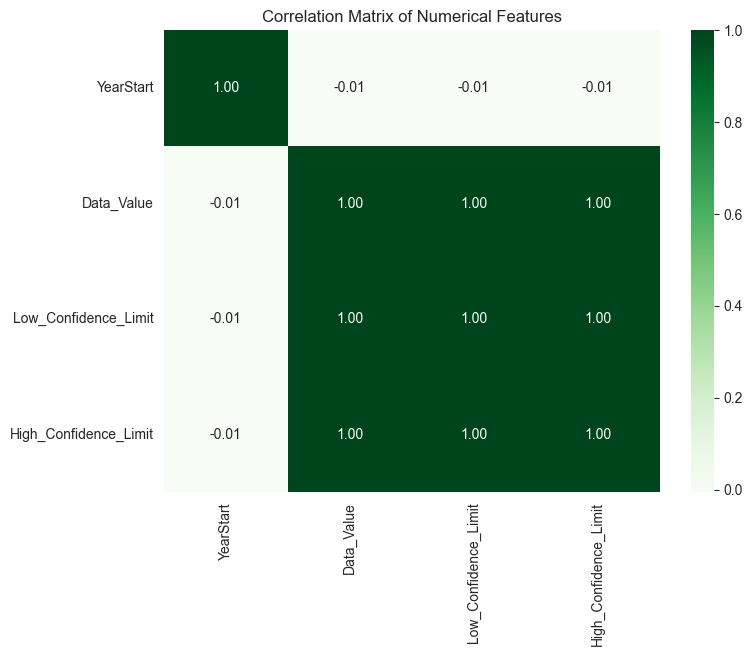

In [61]:
# Set up visualization library settings
sns.set_style("whitegrid")


# Conducting Exploratory Data Analysis (EDA)
# The following will be performed:
# 1. Distribution of numerical data
# 2. Distribution of categorical data
# 3. Correlations between numerical features

# Set the color palette
sns.set_palette("Greens_d")

# 1. Distribution of numerical data
numerical_columns = ['YearStart', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# 2. Distribution of categorical data
categorical_columns_to_plot = ['LocationAbbr', 'Class', 'Break_Out_Category', 'Break_Out']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns_to_plot, 1):
    plt.subplot(2, 2, i)
    top_categories = dataset_cleaned[col].value_counts().nlargest(10)
    sns.barplot(x=top_categories, y=top_categories.index)
    plt.title(f'Top 10 categories in {col}')

plt.tight_layout()
plt.show()

# 3. Correlations between numerical features
correlation_matrix = dataset_cleaned[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

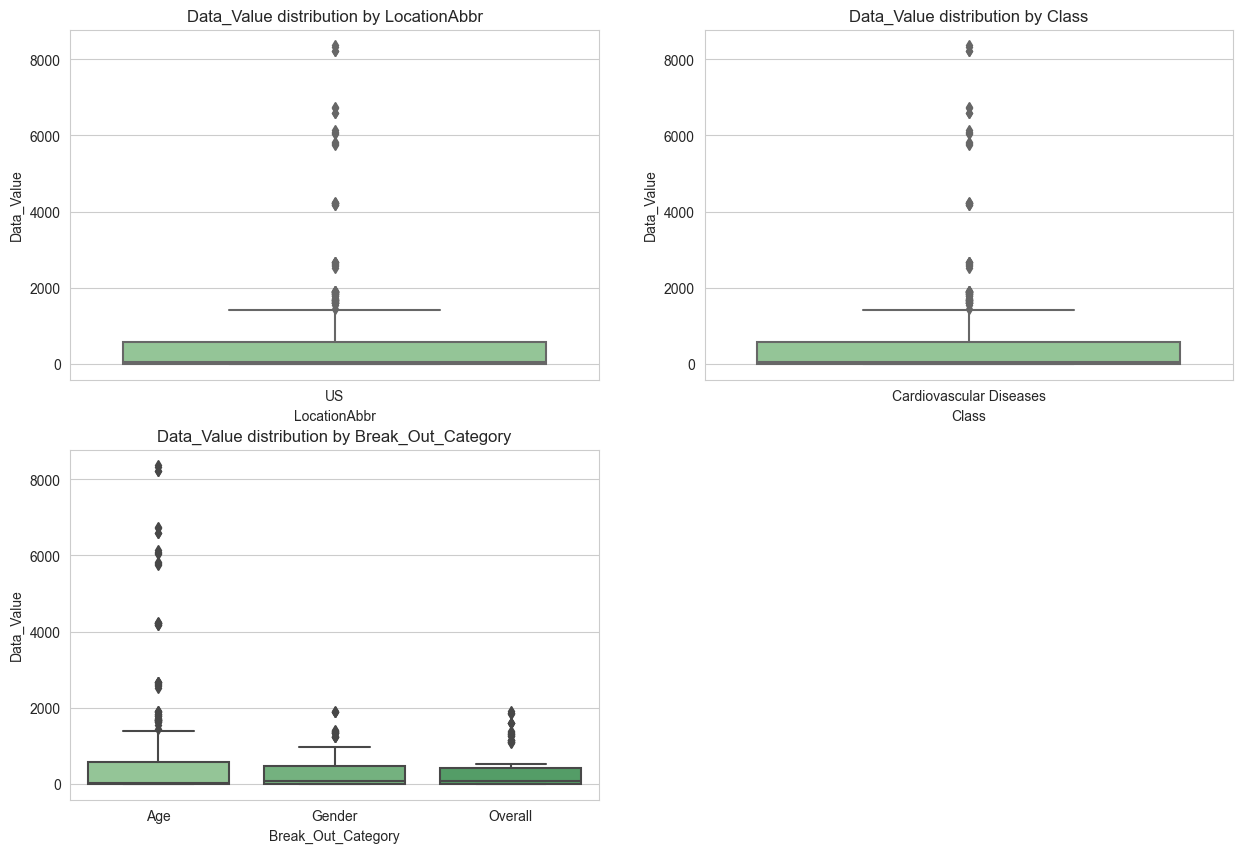

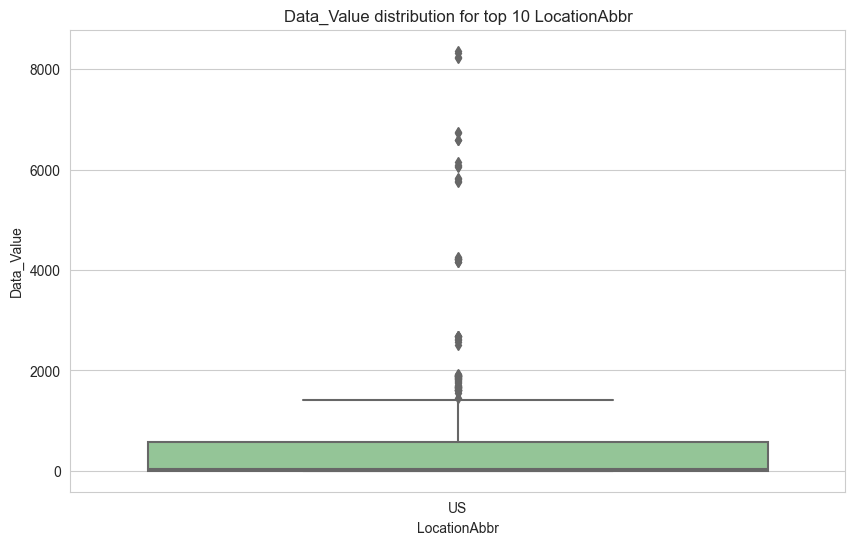

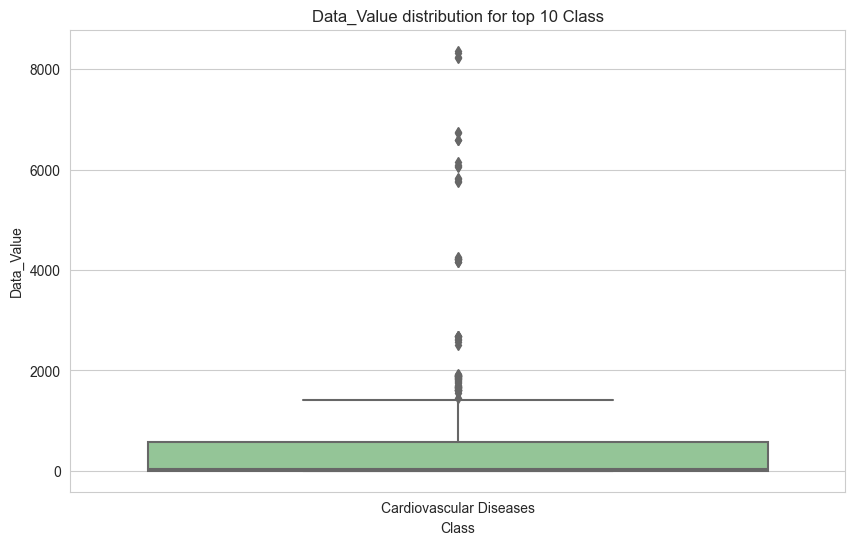

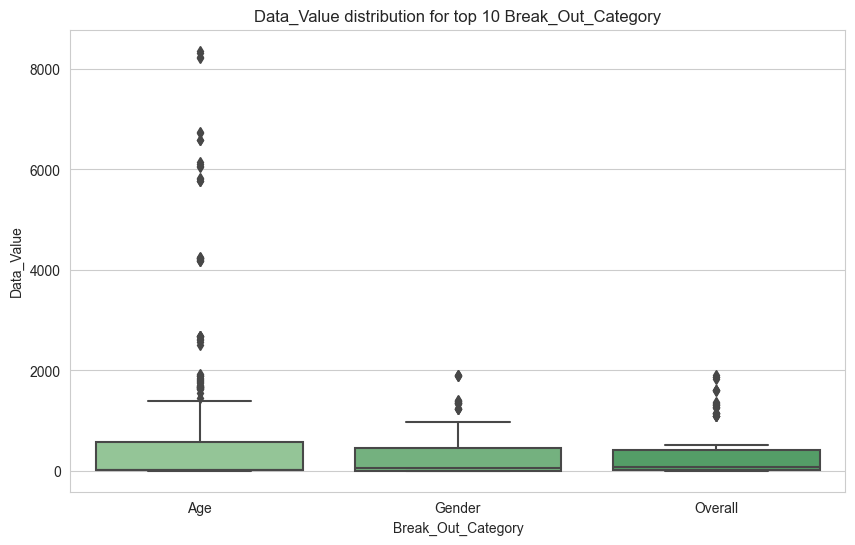

In [65]:
# Selecting a subset of categorical variables to explore against 'Data_Value'
categorical_columns_for_boxplot = ['LocationAbbr', 'Class', 'Break_Out_Category']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns_for_boxplot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='Data_Value', data=dataset_cleaned)
    plt.xticks(rotation=0)
    plt.title(f'Data_Value distribution by {col}')

# Since the number of categories can be quite large, we're focusing on the top categories for each
top_categories_by_col = {col: dataset_cleaned[col].value_counts().nlargest(10).index for col in categorical_columns_for_boxplot}

# Create boxplots for Data_Value distribution for the top categories in each of these columns
for col, top_categories in top_categories_by_col.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Data_Value', data=dataset_cleaned[dataset_cleaned[col].isin(top_categories)])
    plt.xticks(rotation=0)
    plt.title(f'Data_Value distribution for top 10 {col}')
    plt.show()

## Insights from Boxplots of Data_Value Across Different Categorical Variables

### LocationAbbr:
- The median and range of Data_Value vary significantly across locations, indicating regional differences in healthcare utilization, cost, or types of services provided.

### Class:
- Variability in Data_Value suggests differences in costs or utilization among different classes of healthcare services, which could be crucial for identifying influential types of services in the network analysis.

### Break_Out_Category:
- Distribution of Data_Value across different Break_Out_Category indicates categories with higher transaction values, potentially representing critical nodes in the network analysis, such as areas with high patient flow or resource allocation.

### Observations from Top Categories:
- Outliers are present in almost all categories, suggesting the need for further investigation to determine if they represent errors, rare events, or actual high-cost cases.
- Variability in the interquartile range (IQR) across categories indicates disparities in the spread and central tendency of Data_Value.

## Granular Analysis Opportunities:
- Explore the frequency of occurrences within each category to understand the regularity of high-cost services.
- Analyze temporal patterns to identify trends over time.
- Investigate the relationship between Data_Value and LocationDesc to uncover locality-specific patterns.
- Consider examining the relationship between healthcare facilities in terms of patient transfers or referrals to support the network analysis, if such data is available.


In [47]:
# 1. Investigating outliers:
# We will calculate the IQR and determine which data points fall outside of 1.5 * IQR
# These points are considered outliers.
# Note: Due to the potential large number of outliers, we will only show the counts of outliers here.
Q1 = dataset_cleaned['Data_Value'].quantile(0.25)
Q3 = dataset_cleaned['Data_Value'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((dataset_cleaned['Data_Value'] < (Q1 - 1.5 * IQR)) | 
                     (dataset_cleaned['Data_Value'] > (Q3 + 1.5 * IQR)))
outliers_count = outlier_condition.sum()

# 2. Frequency of occurrences within each category:
# We will count the number of occurrences for each category to understand the regularity of high-cost services.
category_occurrences = dataset_cleaned['Class'].value_counts()

# 3. Temporal patterns:
# For temporal patterns, we will plot a line chart of 'Data_Value' over 'YearStart'.
temporal_patterns = dataset_cleaned.groupby('YearStart')['Data_Value'].mean().reset_index()

# 4. Relationship between Data_Value and LocationDesc:
# We will calculate the mean 'Data_Value' for each 'LocationDesc' and plot a bar chart to visualize any locality-specific patterns.
location_data_value = dataset_cleaned.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False)

# Let's execute the analysis and then plot the results.
(outliers_count, category_occurrences, temporal_patterns, location_data_value.head())

(66,
 Class
 Cardiovascular Diseases    600
 Name: count, dtype: int64,
    YearStart  Data_Value
 0       2016  591.446123
 1       2017  579.989579
 2       2018  568.819517
 3       2019  574.581579,
 LocationDesc
 United States    578.709199
 Name: Data_Value, dtype: float64)

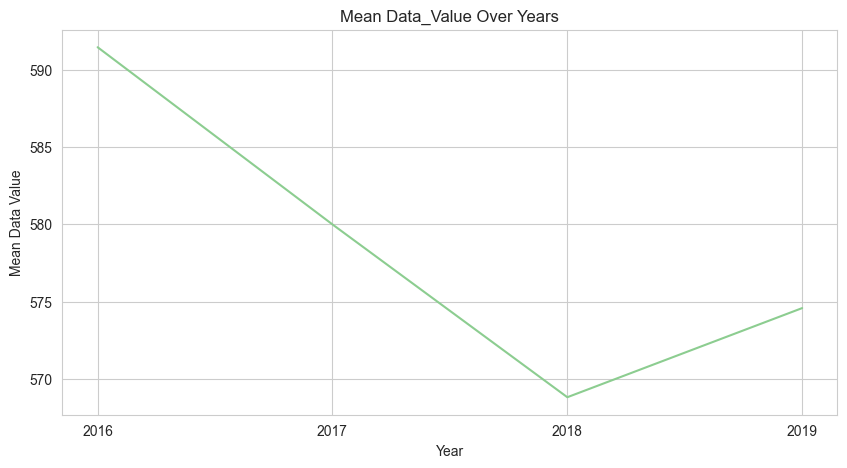

In [63]:
# Plotting the results for better visualization

# 3. Temporal patterns
plt.figure(figsize=(10, 5))
sns.lineplot(x='YearStart', y='Data_Value', data=temporal_patterns)
plt.title('Mean Data_Value Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Data Value')
plt.xticks(temporal_patterns['YearStart'])
plt.show()


In [49]:
# Investigating the characteristics of outliers in more detail
# We will filter out the outlier entries and examine their distribution across different categorical columns to determine their nature

# Extract outliers based on previously determined condition
outliers_data = dataset_cleaned[outlier_condition]

# Summary statistics of outliers
outliers_description = outliers_data.describe()

# Distribution of outliers across 'Class'
outliers_by_class = outliers_data['Class'].value_counts()

# Distribution of outliers across 'Break_Out_Category'
outliers_by_breakout_category = outliers_data['Break_Out_Category'].value_counts()

# Examining the highest and lowest 'Data_Value' among outliers to see if there are specific entries that are extremely high
outliers_data_extreme_values = outliers_data[['Data_Value', 'Class', 'Break_Out_Category', 'LocationAbbr']].sort_values(by='Data_Value', ascending=False).head()

(outliers_description, outliers_by_class, outliers_by_breakout_category, outliers_data_extreme_values)


(         YearStart   Data_Value  Data_Value_Alt  Low_Confidence_Limit  \
 count    66.000000    66.000000       66.000000             66.000000   
 mean   2017.454545  3354.451515     3354.451515           3278.710606   
 std       1.139255  2122.991528     2122.991528           2076.751620   
 min    2016.000000  1450.200000     1450.200000           1406.000000   
 25%    2016.000000  1747.175000     1747.175000           1706.250000   
 50%    2017.000000  1917.300000     1917.300000           1868.450000   
 75%    2018.000000  4247.200000     4247.200000           4153.450000   
 max    2019.000000  8365.600000     8365.600000           8167.400000   
 
        High_Confidence_Limit  LocationId  
 count              66.000000        66.0  
 mean             3430.196970        59.0  
 std              2169.300773         0.0  
 min              1494.400000        59.0  
 25%              1788.200000        59.0  
 50%              1966.250000        59.0  
 75%              4351.8

## Summary Statistics of Outliers

### Range and Mean:
- The outliers range from a Data_Value of about 1,450 to 8,366, with a mean around 3,354.
- The mean year for these outliers is approximately 2017, indicating that these high-value cases are distributed throughout the dataset’s timeframe.

### Distribution:
- All outliers fall under the Cardiovascular Diseases class, suggesting that high-cost cases are predominantly associated with cardiovascular treatments or interventions.
- Most outliers (54 instances) are categorized under the Age breakout category, followed by Overall and Gender, indicating that age-related treatments in cardiovascular diseases are particularly high-cost.

## Examples of Extreme Values
- The top outliers in terms of Data_Value are significantly higher than others, with values near the maximum of 8,365.60, all classified under Age.

## Conclusions
- These outliers do not appear to be errors but rather represent genuine high-cost cases in healthcare, specifically within cardiovascular treatments among different age groups.
- The high values are likely driven by complex and resource-intensive procedures or treatments that are common in managing serious cardiovascular conditions.


## Preprocessing